Data types of columns:
smiles            object
fp_0               int64
fp_1               int64
fp_2               int64
fp_3               int64
                  ...   
RotableBonds       int64
AromaticRings      int64
HeavyAtoms         int64
Rings              int64
pIC50            float64
Length: 2059, dtype: object

Sample of X data:
   fp_0  fp_1  fp_2  fp_3  fp_4  fp_5  fp_6  fp_7  fp_8  fp_9  ...  fp_2038  \
0     0     0     0     0     0     0     0     0     0     0  ...        0   
1     0     0     0     0     0     0     0     0     0     0  ...        0   
2     0     0     0     0     0     0     0     0     0     0  ...        0   
3     0     0     1     0     0     0     0     0     0     0  ...        0   
4     0     0     0     0     0     0     0     0     0     0  ...        0   

   fp_2039  fp_2040  fp_2041  fp_2042  fp_2043  fp_2044  fp_2045  fp_2046  \
0        0        0        0        0        0        0        0        0   
1        0        0       

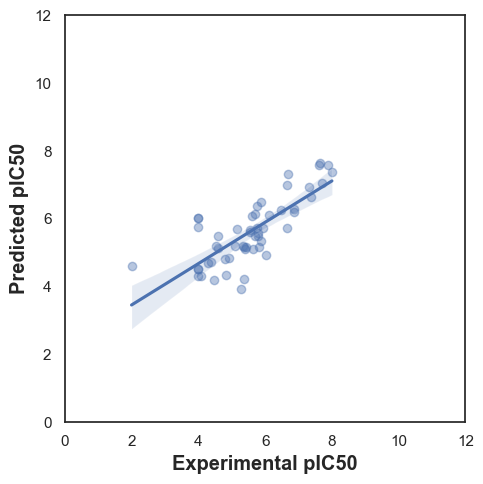

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

# 1. Load the dataset 
df = pd.read_csv('FABP4_06_bioactivity_data_3class_pIC50_rdkit_fp.csv')

# 2. Check the data types of your columns
print("Data types of columns:")
print(df.dtypes)

# 3. Prepare input features and output variable
# Make sure to exclude any non-fingerprint columns
fingerprint_columns = [col for col in df.columns if col.startswith('fp_') or col.isnumeric()]
X = df[fingerprint_columns]  # Only select fingerprint columns
Y = df['pIC50']

# Verify that X contains only numerical data
print("\nSample of X data:")
print(X.head())

# 4. Remove low variance features
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

# 5. Split data (80/20 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 6. Build and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# 7. Calculate R-squared score
r2 = model.score(X_test, Y_test)
print(f"\nR-squared score: {r2}")

# 8. Generate predictions
Y_pred = model.predict(X_test)

# 9. Create scatter plot
plt.figure(figsize=(5, 5))
sns.set(style="white")
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
plt.tight_layout()
plt.show()